# MDS with diodon - an elementary tutorial

In [1]:
import timeit
import numpy as np
import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt
import pydiodon as dio

loading pydiodon - version 22.10.29


## Analysis of a dataset

The dataset analyzed here is a $1,458 \times 1,458$ matrix of dissimilarities between molecular markers of trees in French Guiana from a study on barcopding Amazonian trees. See  [guiana trees](https://doi.org/10.15454/XSJ079) for a presentation of the dataset. Note that the dataset is available in the git `data4test` but with another suffix (.sw.dis). So, you are advised to load the dataset with the function load_dataset() if the library.

### Loading the dataset

First load the dataset by using the function load_dataset(). The name of the dataset is `guiana_trees`. As it is a set of dissimilarities, it is named `Dis`. These are pairwise Smith-Waterman scores of local alignment between molecular markers of taxonomic interest. 

In [2]:
Dis, rn, cn = dio.load_dataset("guiana_trees")

Now,  
- the dissimilarity array is numpy array Dis
- the rownames and column names are respectively in rn and cn. As the array is a dissimilarity array, they are similar. They are the sequence identifiers.

### Running te MDS

In [3]:
X, S = dio.mds(Dis)

732 positive eigenvalues


### Plotting the components

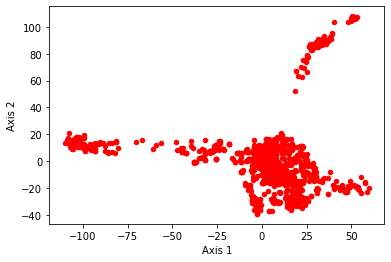

In [4]:
dio.plot_components_scatter(X)

### Plotting the eigenvalues

-> pydiodon:plot_eig()


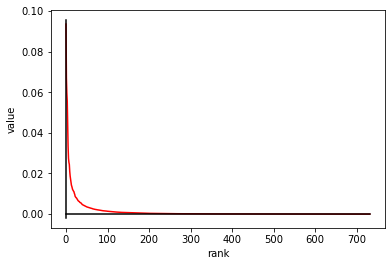

In [5]:
dio.plot_eig(S)

We see that most of the inertia of the point cloud is concentrated in the first axis (the $x$ axis is the ranks of the eigenvalues, and $y$ axis is the fraction of the inertia carried by each axis, in decreasing order). We just adjust the call to dio.plot_eig() for a clearer display. Therefore, we add two arguments:

- $k=50$ to specify we wish to plot the 50 first eigenvalues only (default value is $k=-1$, display all)
- $cum=True$ to specify we wish to plot the cumulated inetrtia (default value is Flase for plotting the inertia per axis)

-> pydiodon:plot_eig()


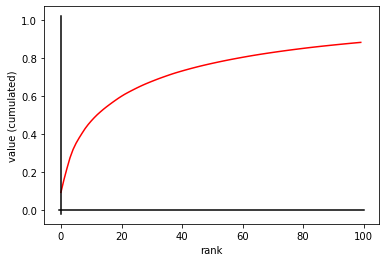

In [6]:
dio.plot_eig(S, k=100, cum=True)

In [7]:
dio.plot_eig(S, k=30, cum=True, pr=True, x11=False)

-> pydiodon:plot_eig()
Cumulated fractions of the inertia:
0.094 ; 0.16 ; 0.22 ; 0.276 ; 0.319 ; 0.352 ; 0.38 ; 0.405 ; 0.429 ; 0.45 ; 0.469 ; 0.486 ; 0.502 ; 0.516 ; 0.53 ; 0.543 ; 0.555 ; 0.567 ; 0.578 ; 0.589 ; 0.599 ; 0.609 ; 0.618 ; 0.626 ; 0.634 ; 0.642 ; 0.65 ; 0.657 ; 0.664 ; 0.671


One sees that the plane $(1,2)$ of the point cloud represents only $16 \%$ of the inertia of the cloud. Hence, studies on  its shape should take into account more dimensions. This can be done with visualization of the point cloud with function plot_components_splines() which implements parallel coordinates.

#### Parallel coordinates

Parallel coordinates is a way to visualize simultaneously several coordinates of
a point clouds in a high dimensional space. Let us suppose we have a point
cloud $X$ of $n$ points with coordinate on axis $j$ for point $i$ being $x_{ij}$ , and that
we wish to visualize coordinates from 1 to $p$. To do this, we set a plot with
labels 1 to $p$ on $x$ axis. Each point $i \in \{1, . . . , n\}$ is represented by a curve
running through all points $(j, x_{ij})$  with $j \in \{1, . . . , p\}. The curves
are smoothed with cubic splines (hence the name of the method). See [parallel coordinates](https:
//en.wikipedia.org/wiki/Parallel_coordinates) for further information on
this method.

Let us start with the visualisation of variatons of 30 first coordinates ($67 \%$ of the inertia). On can see that several items (one item is one curve) have significant coodinates even on axis with large rank.  

[pydiodon]:[plot_components_splines()]


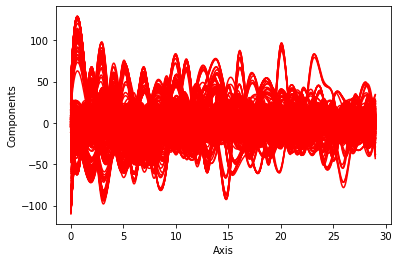

In [8]:
dio.plot_components_splines(X, n_axis=30)

To get a better idea of the concentration of the coordinates on the first xis with more details than just the cumulated fractions of inertia from eigenvalues, let us visualize all axis, by

[pydiodon]:[plot_components_splines()]


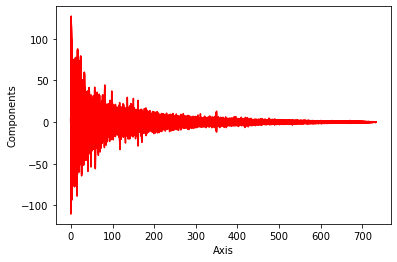

In [9]:
dio.plot_components_splines(X)

One can see that the dispersion around the centroid of the cloud (here, $(0, \ldots,0)$) decreases smoothly, and that we have to wait for large ranks for the coordinates to be non significant.

## Analysis of random matrices

### Building the distance matrix

In [10]:
n = 2000
p = 1000
A = np.random.random((n,p))
dis = ssd.pdist(A)
Dis = ssd.squareform(dis)
print(Dis.shape)

(2000, 2000)


### Running the MDS with svd

In [11]:
print("\nmds with numpy, method svd")
t_start   = timeit.default_timer()
Xrs, Srs	= dio.mds(Dis)
t_stop   = timeit.default_timer()
print("\nDuration with numpy, SVD is", t_stop-t_start)


mds with numpy, method svd
1066 positive eigenvalues

Duration with numpy, SVD is 2.0508963860011136


#### Parallel coordinates for a random distance matrix

[pydiodon]:[plot_components_splines()]


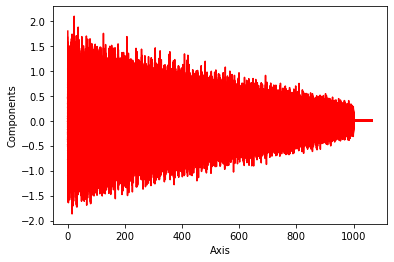

In [12]:
dio.plot_components_splines(Xrs)

### Running MDS with rSVD

In [13]:
print("\nmds with numpy, method grp")
t_start   = timeit.default_timer()
Xrg, Srg	= dio.mds(Dis, k=800, meth="grp")
t_stop   = timeit.default_timer()
print("\nDuration with numpy, rSVD is", t_stop-t_start)


mds with numpy, method grp

Duration with numpy, rSVD is 0.3644644560008601


### Comparison of the results (first eigenvalues)

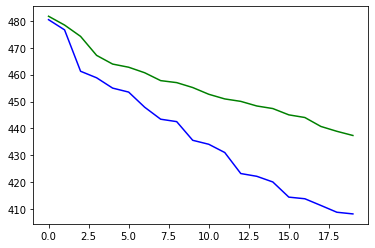

In [14]:
k = 20
plt.plot(Srs[0:k], c="green")
plt.plot(Srg[0:k], c="blue")
plt.show()